<a href="https://colab.research.google.com/github/solihatuljannah/UAS-Kelompok-12/blob/main/FA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [67]:
from google.colab import files
import io
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis


import library

# Dataset

In [68]:
dataset = pd.read_csv('https://raw.githubusercontent.com/solihatuljannah/UAS-Kelompok-12/main/data_cancer.csv')
dataset.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


*italicized text*

mengupload dataset

In [69]:
dataset.shape

(569, 33)

In [70]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [71]:
dataset = dataset.drop(columns=['Unnamed: 32'])

In [72]:
x = dataset.iloc[:, 2:31].values
y = dataset.iloc[:, 1].values


In [73]:
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

# MLP sebelum FA

In [74]:
print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(max_iter=600)
hasil =mlp.fit(X_train,y_train)

dataset :  (569, 32)
x :  (569, 29)
y :  (569,)


In [75]:
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('accuracy is ',accuracy_score(predictions,y_test))

[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

accuracy is  0.9736842105263158


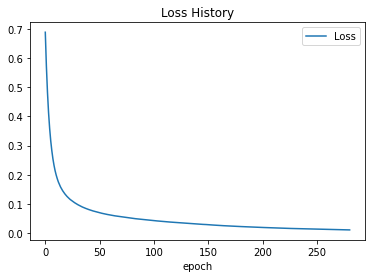

In [76]:


plt.plot(hasil.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

membagi dataset menjadi dependent dan independent data

# FA data banyak

In [77]:

x = StandardScaler().fit_transform(x)

In [78]:

fa = FactorAnalysis(n_components=2)
x_fa = fa.fit_transform(x)
fadf = pd.DataFrame(data = x_fa,columns=['fa1','fa2'])
fadf.head()

,fa1,fa2
0,1.180364,2.832064
1,1.771567,-1.551100
2,1.578395,0.410345
3,-0.683991,4.242513
4,1.756121,-0.244201


In [79]:
pd_y = pd.DataFrame(y, columns = ['target'])
pd_y.head()


,target
0,M
1,M
2,M
3,M
4,M


In [80]:
finalDf = pd.concat([fadf, pd_y[['target']]], axis = 1)
finalDf.head()

,fa1,fa2,target
0,1.180364,2.832064,M
1,1.771567,-1.551100,M
2,1.578395,0.410345,M
3,-0.683991,4.242513,M
4,1.756121,-0.244201,M


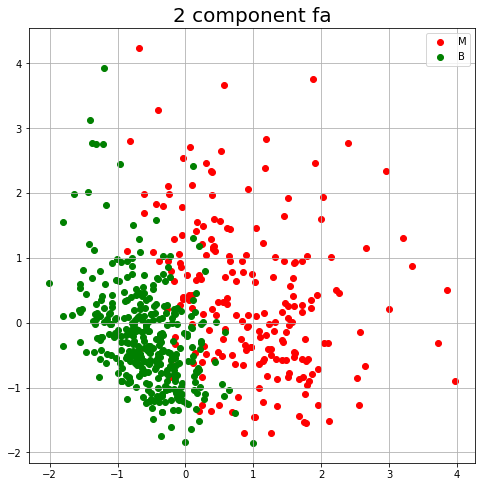

In [81]:


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_title('2 component fa', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'fa1']
               , finalDf.loc[indicesToKeep, 'fa2']
               , c = color)
ax.legend(targets)
ax.grid()

# FA data sedikit

In [82]:
X2=dataset[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']]
Y2=dataset[['diagnosis']]

In [83]:
X2 = StandardScaler().fit_transform(X2)

In [84]:
X2.shape

(569, 5)

In [85]:
fa2 = FactorAnalysis(n_components=2)
x_fa2 = fa.fit_transform(X2)
fadf2 = pd.DataFrame(data = x_fa2)
fadf2.head()

,0,1
0,1.633015,-4.568250
1,1.715709,1.053474
2,1.493315,0.845167
3,-0.544358,-1.934858
4,1.586756,1.546559


In [86]:
finalDf2 = pd.concat([fadf2, dataset[['diagnosis']]], axis = 1)
finalDf2.head()

,0,1,diagnosis
0,1.633015,-4.568250,M
1,1.715709,1.053474,M
2,1.493315,0.845167,M
3,-0.544358,-1.934858,M
4,1.586756,1.546559,M


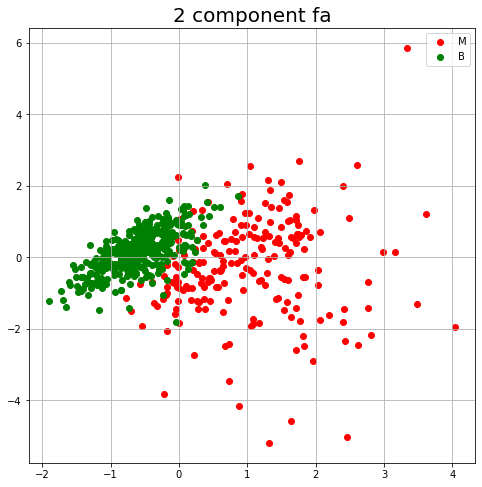

In [87]:


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_title('2 component fa', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['diagnosis'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 0]
               , finalDf2.loc[indicesToKeep, 1]
               , c = color)
ax.legend(targets)
ax.grid()

# MPL setelah FA Data Banyak

In [88]:
dataset_clas1 = finalDf
y_clas1 = dataset_clas1['target']
x_clas1 = dataset_clas1.drop(['target'], axis=1)

print ("dataset : ",dataset_clas1.shape)
print ("x : ",x_clas1.shape)
print ("y : ",y_clas1.shape)

dataset :  (569, 3)
x :  (569, 2)
y :  (569,)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(x_clas1, y_clas1, test_size = 0.2, random_state = 42)

membagi data train dan data test

In [90]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [91]:

mlp = MLPClassifier(max_iter=600)
hasil =mlp.fit(X_train,y_train)

# Hasil Akurasi

In [92]:
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('accuracy is ',accuracy_score(predictions,y_test))

[[69  2]
 [ 5 38]]
              precision    recall  f1-score   support

           B       0.93      0.97      0.95        71
           M       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

accuracy is  0.9385964912280702


# Curva Loss

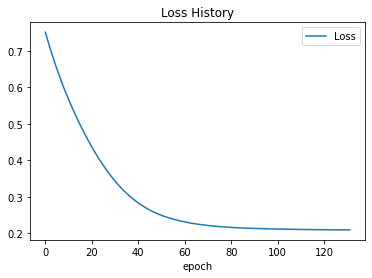

In [93]:


plt.plot(hasil.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

# MLP setelah FA Data Dikit

In [94]:
dataset_clas1 = finalDf2
y_clas1 = dataset_clas1['diagnosis']
x_clas1 = dataset_clas1.drop(['diagnosis'], axis=1)

print ("dataset : ",dataset_clas1.shape)
print ("x : ",x_clas1.shape)
print ("y : ",y_clas1.shape)

dataset :  (569, 3)
x :  (569, 2)
y :  (569,)


In [95]:
X_train, X_test, y_train, y_test = train_test_split(x_clas1, y_clas1, test_size = 0.2, random_state = 42)

membagi data train dan data test

In [96]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [97]:

mlp = MLPClassifier(max_iter=600)
hasil =mlp.fit(X_train,y_train)

# Hasil Akurasi

In [98]:
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('accuracy is ',accuracy_score(predictions,y_test))

[[71  0]
 [ 4 39]]
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        71
           M       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

accuracy is  0.9649122807017544


# Curva Loss

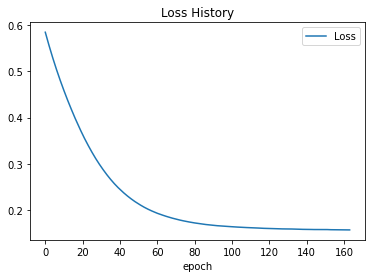

In [99]:


plt.plot(hasil.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])